# Objectives
- Visualize the distribution of sentiment towards buses and trains using bar charts or pie charts
- Analyze geographic disparities in opinion using heatmaps or choropleth maps
- Identify key arguments for and against the policy by analyzing frequently used keywords and phrases
- Correlate user demographics with sentiment to understand different subgroups' perspectives(most especially spatial distribution of responses).

In [898]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [899]:
df = pd.read_csv("transport_subsidy_data.csv", encoding = 'latin1')

In [900]:
df.head()

,Name,Gender,Location,Date,Likes,Comment,URL,Profile Image
0,Ibrahim Umar Bk,M,Katsina,12/20/2023 14:35,0.0,Thank you for the information,https://www.exportcomments.com/done/166fc715-6...,https://scontent-sea1-1.xx.fbcdn.net/v/t39.308...
1,Paul Wankari,M,Yola,12/20/2023 14:40,0.0,There's simply no sense in this. Would the tra...,https://www.exportcomments.com/done/166fc715-6...,https://scontent-sea1-1.xx.fbcdn.net/v/t1.6435...
2,Abk Tahir,M,Yola,12/20/2023 14:42,0.0,"This is commendable Thank you our able GCFR, P...",https://www.exportcomments.com/done/166fc715-6...,https://scontent-dfw5-2.xx.fbcdn.net/v/t39.308...
3,Alfa M. Lawan,M,Yola,12/20/2023 14:49,0.0,How would that be implemented knowingly well t...,https://www.exportcomments.com/done/166fc715-6...,https://scontent-sea1-1.xx.fbcdn.net/v/t39.308...
4,Roland Ugbonaghara,M,Lagos,12/20/2023 15:01,1.0,FGN buses only I guess,https://www.exportcomments.com/done/166fc715-6...,https://scontent-sea1-1.xx.fbcdn.net/v/t39.308...


In [901]:
df.tail()

,Name,Gender,Location,Date,Likes,Comment,URL,Profile Image
1060,wonuola_xoxo,F,NaN,"12/24/2023, 9:57:44 AM",NaN,@kingkopay ?????,NaN,NaN
1061,yeancahbabe,F,NaN,"12/22/2023, 11:23:35 PM",NaN,???? will.they enter the train with empty stom...,NaN,NaN
1062,young_shall_grow,M,NaN,"12/26/2023, 1:13:01 PM",NaN,God Abeg ?????,NaN,NaN
1063,zino_gold_21,F,NaN,"1/6/2024, 9:21:26 PM",NaN,NaN,NaN,NaN
1064,NaN,NaN,NaN,"12/22/2023, 5:05:29 PM",NaN,NaN,NaN,NaN


In [902]:
df1 = df.copy()

In [903]:
df1.head()

,Name,Gender,Location,Date,Likes,Comment,URL,Profile Image
0,Ibrahim Umar Bk,M,Katsina,12/20/2023 14:35,0.0,Thank you for the information,https://www.exportcomments.com/done/166fc715-6...,https://scontent-sea1-1.xx.fbcdn.net/v/t39.308...
1,Paul Wankari,M,Yola,12/20/2023 14:40,0.0,There's simply no sense in this. Would the tra...,https://www.exportcomments.com/done/166fc715-6...,https://scontent-sea1-1.xx.fbcdn.net/v/t1.6435...
2,Abk Tahir,M,Yola,12/20/2023 14:42,0.0,"This is commendable Thank you our able GCFR, P...",https://www.exportcomments.com/done/166fc715-6...,https://scontent-dfw5-2.xx.fbcdn.net/v/t39.308...
3,Alfa M. Lawan,M,Yola,12/20/2023 14:49,0.0,How would that be implemented knowingly well t...,https://www.exportcomments.com/done/166fc715-6...,https://scontent-sea1-1.xx.fbcdn.net/v/t39.308...
4,Roland Ugbonaghara,M,Lagos,12/20/2023 15:01,1.0,FGN buses only I guess,https://www.exportcomments.com/done/166fc715-6...,https://scontent-sea1-1.xx.fbcdn.net/v/t39.308...


In [904]:
print(f"The data contains {df1.shape} rows and columns respectively")

The data contains (1065, 8) rows and columns respectively


In [905]:
df.columns

Index(['Name', 'Gender', 'Location', 'Date', 'Likes', 'Comment', 'URL',
       'Profile Image'],
      dtype='object')

In [906]:
#Data overview
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1065 entries, 0 to 1064
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           1064 non-null   object 
 1   Gender         1064 non-null   object 
 2   Location       794 non-null    object 
 3   Date           1065 non-null   object 
 4   Likes          831 non-null    float64
 5   Comment        1063 non-null   object 
 6   URL            794 non-null    object 
 7   Profile Image  736 non-null    object 
dtypes: float64(1), object(7)
memory usage: 66.7+ KB


observations:
1. There is one float column
2. There are 7 Object columns

In [907]:
df1.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,1064,968,realbash05,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,1064,4,M,775,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,794,78,Lagos,223,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,1065,896,12/20/2023 14:18,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Likes,831.0,NaN,NaN,NaN,0.714801,1.92742,0.0,0.0,0.0,1.0,26.0
Comment,1063,980,?,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
URL,794,794,https://www.exportcomments.com/done/166fc715-6...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Profile Image,736,719,https://scontent.fhan2-3.fna.fbcdn.net/v/t39.3...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [908]:
df1.duplicated().sum()

1

In [909]:
df1.isnull().sum()

Name               1
Gender             1
Location         271
Date               0
Likes            234
Comment            2
URL              271
Profile Image    329
dtype: int64

# Data Cleaning 

In [910]:
# removing the unwanted columns
columns_to_remove = ['URL','Profile Image']
df1 = df1.drop(columns=columns_to_remove)
df1.head()

,Name,Gender,Location,Date,Likes,Comment
0,Ibrahim Umar Bk,M,Katsina,12/20/2023 14:35,0.0,Thank you for the information
1,Paul Wankari,M,Yola,12/20/2023 14:40,0.0,There's simply no sense in this. Would the tra...
2,Abk Tahir,M,Yola,12/20/2023 14:42,0.0,"This is commendable Thank you our able GCFR, P..."
3,Alfa M. Lawan,M,Yola,12/20/2023 14:49,0.0,How would that be implemented knowingly well t...
4,Roland Ugbonaghara,M,Lagos,12/20/2023 15:01,1.0,FGN buses only I guess


In [911]:
df1.isnull().sum()

Name          1
Gender        1
Location    271
Date          0
Likes       234
Comment       2
dtype: int64

In [912]:
unique_states = df1['Location'].unique()
unique_states

array(['Katsina', 'Yola', 'Lagos', 'Ilorin', 'Abuja', 'Kaduna', 'Benin',
       'Bauchi', 'Oyo', 'Kogi', 'Ondo', 'Umuahia', 'Enuu', 'Akwa Ibom',
       'Anambra', 'Imo', 'Enugu', 'Ibadan', 'Kano', 'Uyo', 'Rivers',
       'Benue', 'Onitsha', 'Port Harcourt', 'Jos', 'Ado-Ekiti', 'Warri',
       'Lokoja', 'Gombe', 'Abia', 'Edo', 'Ogun', 'Zaria', 'Owerri',
       'Minna', 'Makurdi', 'Plateau', 'Ile-ife', 'Osogbo', 'Akure',
       'Asaba', 'Ebonyi', 'Ogbomoso', 'Calabar', 'Abeokuta', 'Yenagoa',
       'kafanchan', 'Auchi', 'Lafia', 'Gusau', 'Ijebu', 'Abakaliki',
       'Saki', 'Ghana', 'Offa', 'Birni-Kebbi', 'Sango otta', 'Aba',
       'Nassarawa', 'Jalingo', 'Ilesha', 'Sokoto', 'Nsukka', 'Maiduguri',
       'Kenya', 'Iragbiji', 'Dutse', 'Cotonou', 'Ikorodu', 'Ijebu-ode',
       'Delta', 'Kwara', 'Owo', 'Accra', 'Yobe', 'Ekpene', 'Sapele',
       'Kwale', nan], dtype=object)

In [913]:
#filling locations 
df1['Location'] = df1.apply(lambda row: random.choice(unique_states)if pd.isna(row['Location']) else row['Location'], axis = 1)

In [914]:
df1['Location'].isnull().sum()

3

In [915]:
# filling likes column
unique_likes = df1['Likes'].unique()

In [916]:
df1['Likes'] = df1['Likes'].apply(lambda x: random.choice(unique_likes) if pd.isna(x) else x)

In [917]:
df1['Likes'].isnull().sum()

11

In [918]:
likes_empty = df1['Likes'].isna().sum()

In [919]:
random_likes = np.random.choice(df1['Likes'].dropna(), size = likes_empty)
df1['Likes'].fillna(pd.Series(random_likes), inplace = True)

In [920]:
df1['Likes'] = df1['Likes'].apply(lambda x: random.choice(random_likes) if pd.isna(x) else x)

In [921]:
df1['Likes'].isnull().sum()

0

In [922]:
df1.isnull().sum()

Name        1
Gender      1
Location    3
Date        0
Likes       0
Comment     2
dtype: int64

In [923]:
df1.dropna(axis = 0, inplace = True)

In [924]:
df1.isnull().sum()

Name        0
Gender      0
Location    0
Date        0
Likes       0
Comment     0
dtype: int64

In [925]:
# separating date and time 

In [926]:
import datetime

In [927]:
df1['Date'] = pd.to_datetime(df1['Date'], errors='coerce')

In [928]:
df1['day_name'] = df1['Date'].dt.day_name()
df1['month'] = df1['Date'].dt.month
df1['year'] = df1['Date'].dt.year
df1['hour'] = df1['Date'].dt.hour
df1['minute'] = df1['Date'].dt.minute

In [929]:
df1.head()

,Name,Gender,Location,Date,Likes,Comment,day_name,month,year,hour,minute
0,Ibrahim Umar Bk,M,Katsina,2023-12-20 14:35:00,0.0,Thank you for the information,Wednesday,12,2023,14,35
1,Paul Wankari,M,Yola,2023-12-20 14:40:00,0.0,There's simply no sense in this. Would the tra...,Wednesday,12,2023,14,40
2,Abk Tahir,M,Yola,2023-12-20 14:42:00,0.0,"This is commendable Thank you our able GCFR, P...",Wednesday,12,2023,14,42
3,Alfa M. Lawan,M,Yola,2023-12-20 14:49:00,0.0,How would that be implemented knowingly well t...,Wednesday,12,2023,14,49
4,Roland Ugbonaghara,M,Lagos,2023-12-20 15:01:00,1.0,FGN buses only I guess,Wednesday,12,2023,15,1


In [930]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1060 entries, 0 to 1062
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Name      1060 non-null   object        
 1   Gender    1060 non-null   object        
 2   Location  1060 non-null   object        
 3   Date      1060 non-null   datetime64[ns]
 4   Likes     1060 non-null   float64       
 5   Comment   1060 non-null   object        
 6   day_name  1060 non-null   object        
 7   month     1060 non-null   int64         
 8   year      1060 non-null   int64         
 9   hour      1060 non-null   int64         
 10  minute    1060 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 99.4+ KB


In [931]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Likes,1060.0,2.206604,4.468308,0.0,0.0,0.0,2.0,26.0
month,1060.0,9.611321,4.517500,1.0,12.0,12.0,12.0,12.0
year,1060.0,2023.184906,0.521274,2019.0,2023.0,2023.0,2023.0,2024.0
hour,1060.0,13.457547,5.536648,0.0,10.0,14.0,18.0,23.0
minute,1060.0,29.033962,17.333718,0.0,14.0,28.0,45.0,59.0


# Exploratory data analysis

In [932]:
#checking for the unique values for the categorical variables
# filtering objects and category type columns to check out properties

cat_columns = df1.describe(include=["object", "category"]).columns
cat_columns

Index(['Name', 'Gender', 'Location', 'Comment', 'day_name'], dtype='object')

In [933]:
#gettinng the unique values for the categorical columns
for i in cat_columns:
    print("the unique values in", i, "are;")
    print(df1[i].value_counts())
    print("*" *50)

the unique values in Name are;
realbash05               9
eleshin1                 6
virus_mm                 5
Adeleke Joseph           3
Abibola F Wunmi          3
                        ..
Amos Majiyebo Aichabu    1
Joy Mylius               1
Nglass Darene            1
Abdullah Addau           1
young_shall_grow         1
Name: Name, Length: 966, dtype: int64
**************************************************
the unique values in Gender are;
M     773
F     280
m       4
M       3
Name: Gender, dtype: int64
**************************************************
the unique values in Location are;
Lagos            227
Abuja             90
Kaduna            37
Port Harcourt     36
Enugu             33
                ... 
Nassarawa          3
Dutse              3
Ikorodu            2
Aba                2
Sapele             2
Name: Location, Length: 78, dtype: int64
**************************************************
the unique values in Comment are;
?                                       

In [934]:
df1['Gender'].value_counts()

M     773
F     280
m       4
M       3
Name: Gender, dtype: int64

In [935]:
#replace 'm' with M
df1['Gender'] = df1['Gender'].replace('m', 'M')

In [936]:
df1['Gender'].value_counts()

M     777
F     280
M       3
Name: Gender, dtype: int64

In [937]:
df1['Gender'].map({'M':'M', 'F': 'F'}).value_counts()

M    777
F    280
Name: Gender, dtype: int64

In [938]:
df1 = df1[df1['Gender'].isin(['M','F'])]

In [939]:
df1['Gender'].value_counts()

M    777
F    280
Name: Gender, dtype: int64

Text(0.5, 1.0, 'Gender_Counts')

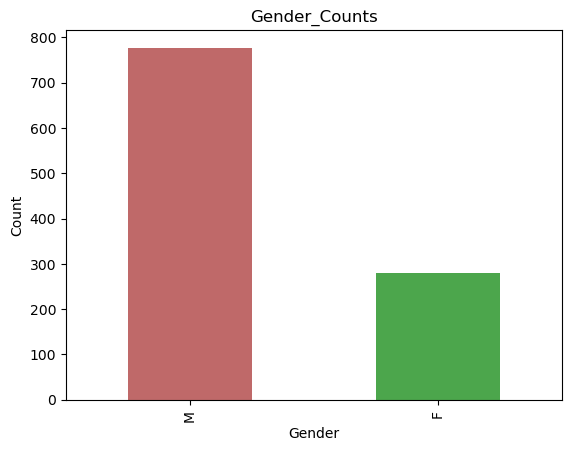

In [940]:
df1['Gender'].value_counts().plot(kind ='bar', color = ['brown','green'], alpha = 0.7)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title("Gender_Counts")

In [941]:
df1['Location'].value_counts().nlargest(10)

Lagos            225
Abuja             90
Kaduna            37
Port Harcourt     36
Enugu             33
Ilorin            32
Owerri            30
Benin             26
Uyo               26
Ibadan            26
Name: Location, dtype: int64

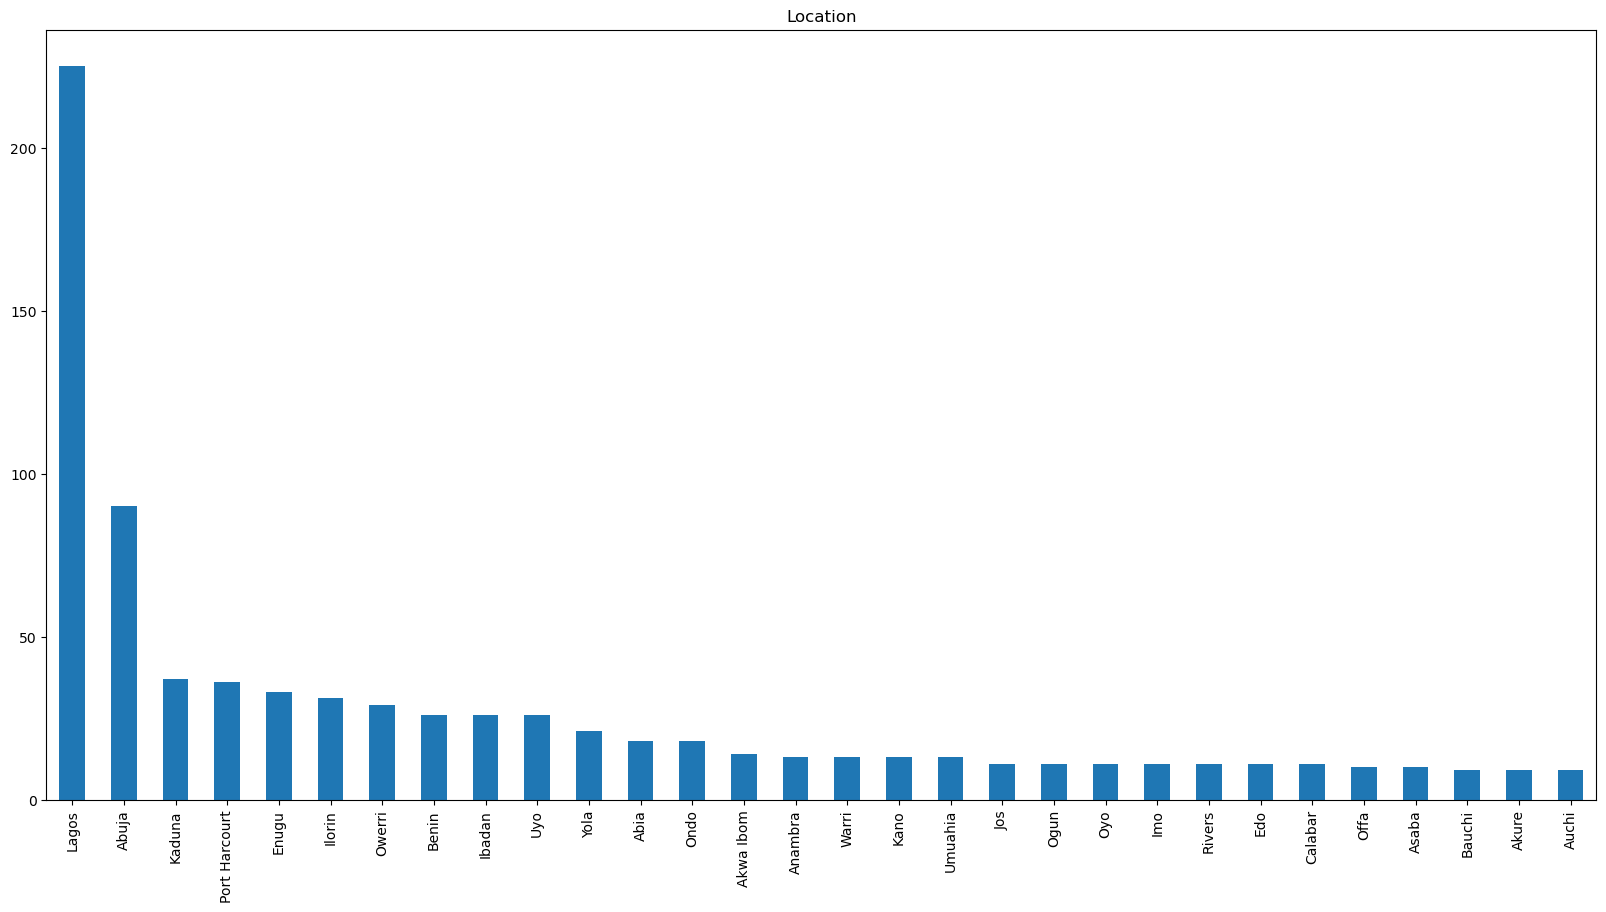

In [1022]:
#plot the top value_counts for location
plt.figure(figsize=(20,10))
df1['Location'].value_counts().nlargest(30).plot(kind='bar')
plt.xticks(rotation= 90)
plt.title("Location")
#plt.legend()
plt.show()

Comments from various locations may reflect the local experiences and challenges faced by individuals in response to the policy. The fact that Lagos has the highest count of comments indicates a significant level of engagement from individuals in Lagos. This might be attributed to the high population density and diverse demographic in Lagos, potentially making it a hub for discussions. Next is Abuja and this could be influenced by the policy’s impact on individuals in the capital city

In [943]:
df1['year'].value_counts()

2023    818
2024    227
2021      8
2019      4
Name: year, dtype: int64

Text(0.5, 1.0, 'count of each year')

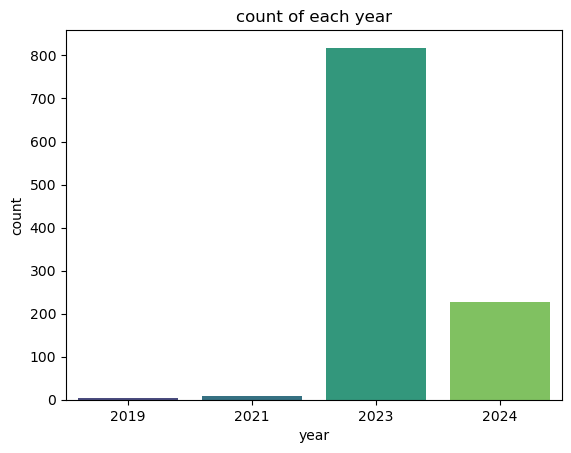

In [944]:
sns.countplot(x='year', data = df1, palette ='viridis')
plt.xlabel('year')
plt.ylabel('count')
plt.title("count of each year")

In [945]:
df1['month'].value_counts()

12    818
1     227
11      8
8       4
Name: month, dtype: int64

Text(0.5, 1.0, 'count of each month')

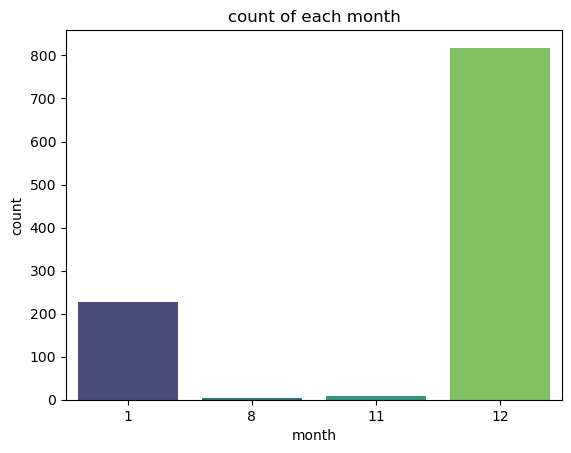

In [946]:
sns.countplot(x='month', data = df1, palette ='viridis')
plt.xlabel('month')
plt.ylabel('count')
plt.title("count of each month")

The surge in comments and sentiments during December aligns with the announcement and commencement of the transport subsidy policy on December 21, 2023. Increased public awareness and discussions around the policy during this time likely contributed to heightened engagement. The sustained activity in December suggest that discussions around the policy continued throughout the month, indicating ongoing interest and reactions from the public

In [947]:
df1['day_name'].value_counts()

Wednesday    348
Thursday     199
Friday       167
Tuesday      122
Saturday     110
Sunday        78
Monday        33
Name: day_name, dtype: int64

Text(0.5, 1.0, 'count of each day')

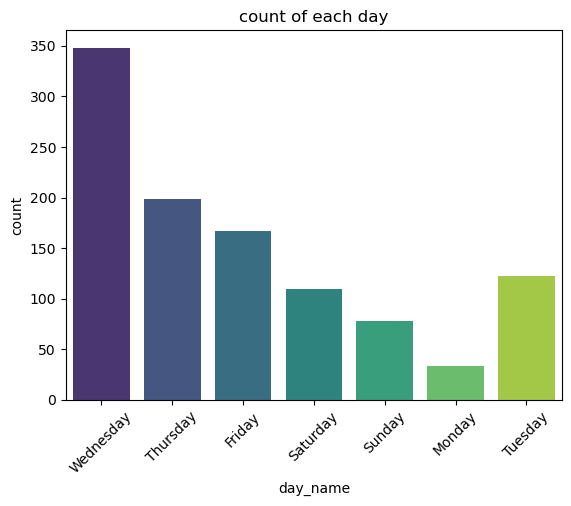

In [948]:
sns.countplot(x='day_name', data = df1, palette ='viridis')
plt.xlabel('day_name')
plt.ylabel('count')
plt.xticks(rotation = 45)
plt.title("count of each day")

- Observations:
- It appears that there is higher engagement and commenting activity in the middle of the week, specifically on Wednesday and this suggests a peak in user engagement and discussion activity midweek. The trend continues with Thursday and Friday showing significant comments counts, indicating sustained interests and participation towards the end of the week

# Text Analysis

In [949]:
import neattext.functions as nfx

In [950]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [951]:
df1['Comment']

0                           Thank you for the information
1       There's simply no sense in this. Would the tra...
2       This is commendable Thank you our able GCFR, P...
3       How would that be implemented knowingly well t...
4                                  FGN buses only I guess
                              ...                        
1058                Person say na bonanza for kidnappers?
1059    This baba dont want peace?He want problem alw...
1060                                     @kingkopay ?????
1061    ???? will.they enter the train with empty stom...
1062                                       God Abeg ?????
Name: Comment, Length: 1057, dtype: object

In [952]:
#remove all mentions #remove hashtags #url #emojis #special characters

In [953]:
df1['Comment'].apply(nfx.extract_hashtags)

0       []
1       []
2       []
3       []
4       []
        ..
1058    []
1059    []
1060    []
1061    []
1062    []
Name: Comment, Length: 1057, dtype: object

In [954]:
#cleaning of the text by removing the hashtags
df1['clean_Comment'] = df1['Comment'].apply(nfx.remove_hashtags)

In [955]:
df1[['Comment', 'clean_Comment']]

,Comment,clean_Comment
0,Thank you for the information,Thank you for the information
1,There's simply no sense in this. Would the tra...,There's simply no sense in this. Would the tra...
2,"This is commendable Thank you our able GCFR, P...","This is commendable Thank you our able GCFR, P..."
3,How would that be implemented knowingly well t...,How would that be implemented knowingly well t...
4,FGN buses only I guess,FGN buses only I guess
...,...,...
1058,Person say na bonanza for kidnappers?,Person say na bonanza for kidnappers?
1059,This baba dont want peace?He want problem alw...,This baba dont want peace?He want problem alw...
1060,@kingkopay ?????,@kingkopay ?????
1061,???? will.they enter the train with empty stom...,???? will.they enter the train with empty stom...


# Sentiment Analysis

In [956]:
from textblob import TextBlob

In [957]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
    if sentiment_polarity > 0:
        sentiment_label = 'Positive'
    elif sentiment_polarity < 0:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
    result = {'Polarity':sentiment_polarity,
              'subjectivity':sentiment_subjectivity,
              'sentiment':sentiment_label}
    return result

    positive = percentage(positive, noOfTweet)
    negative = percentage(negative, noOfTweet)
    neutral = percentage(neutral, noOfTweet)
    

In [958]:
fx1 =df1['clean_Comment'].iloc[5]

In [959]:
get_sentiment(fx1)

{'Polarity': 0.30000000000000004, 'subjectivity': 0.5, 'sentiment': 'Positive'}

In [960]:
df1['sentiment_results'] = df1['clean_Comment'].apply(get_sentiment) 

In [961]:
df1['sentiment_results']

0       {'Polarity': 0.0, 'subjectivity': 0.0, 'sentim...
1       {'Polarity': -0.0625, 'subjectivity': 0.366071...
2       {'Polarity': 0.5, 'subjectivity': 0.625, 'sent...
3       {'Polarity': 0.3, 'subjectivity': 0.6875, 'sen...
4       {'Polarity': 0.0, 'subjectivity': 1.0, 'sentim...
                              ...                        
1058    {'Polarity': 0.0, 'subjectivity': 0.0, 'sentim...
1059    {'Polarity': 0.0, 'subjectivity': 0.0, 'sentim...
1060    {'Polarity': 0.0, 'subjectivity': 0.0, 'sentim...
1061    {'Polarity': -0.1, 'subjectivity': 0.5, 'senti...
1062    {'Polarity': 0.0, 'subjectivity': 0.0, 'sentim...
Name: sentiment_results, Length: 1057, dtype: object

In [962]:
#to split into individual component
df1['sentiment_results'].iloc[7]

{'Polarity': -0.5, 'subjectivity': 0.5, 'sentiment': 'Negative'}

In [963]:
pd.json_normalize(df1['sentiment_results'].iloc[0])

,Polarity,subjectivity,sentiment
0,0.0,0.0,Neutral


In [964]:
df1 = df1.join(pd.json_normalize(df1['sentiment_results']))

# Visualizing the sentimental Distribution

In [965]:
#getting the valuecounts of the result
df1['sentiment'].value_counts()

Neutral     629
Positive    303
Negative    119
Name: sentiment, dtype: int64

<AxesSubplot:xlabel='sentiment', ylabel='count'>

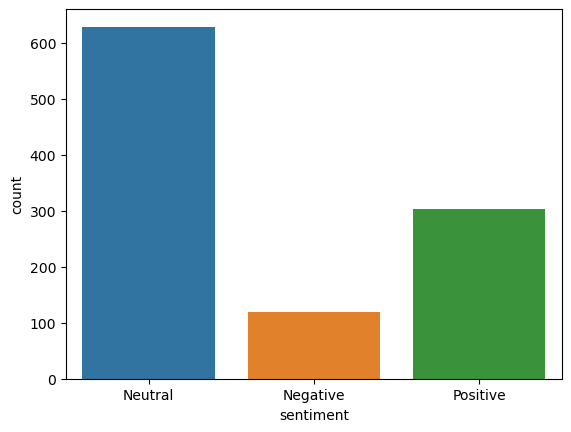

In [966]:
sns.countplot(df1['sentiment'])

- observations
- The sentiment distribution towards buses and trains, as visualized in the bar plot, reveals that a significant portion of responses falls within the neutral sentiment category. This suggests that a considerable number of individuals may hold neutral opinions or have mixed sentiments regarding the transportation policy. The positive sentiment comes next in frequency, indicating a favorable view from another portion of respondents. On the other hand, the negative sentiment category has the lowest frequency, suggesting that a smaller portion of individuals express explicitly negative opinions. This distribution implies a diverse range of sentiments with a notable presence of neutrality in the comments.

# Geographic disparities in opinion using heatmap

In [967]:
df1['Polarity'] = pd.to_numeric(df1['Polarity'], errors = 'coerce')

In [968]:
df1 = df1.dropna(subset=['Polarity'])

In [969]:
df1['Location'] = df1['Location'].astype('category')

In [970]:
heatmap_data = pd.pivot_table(df1, values='Polarity', index='Location', aggfunc='mean')

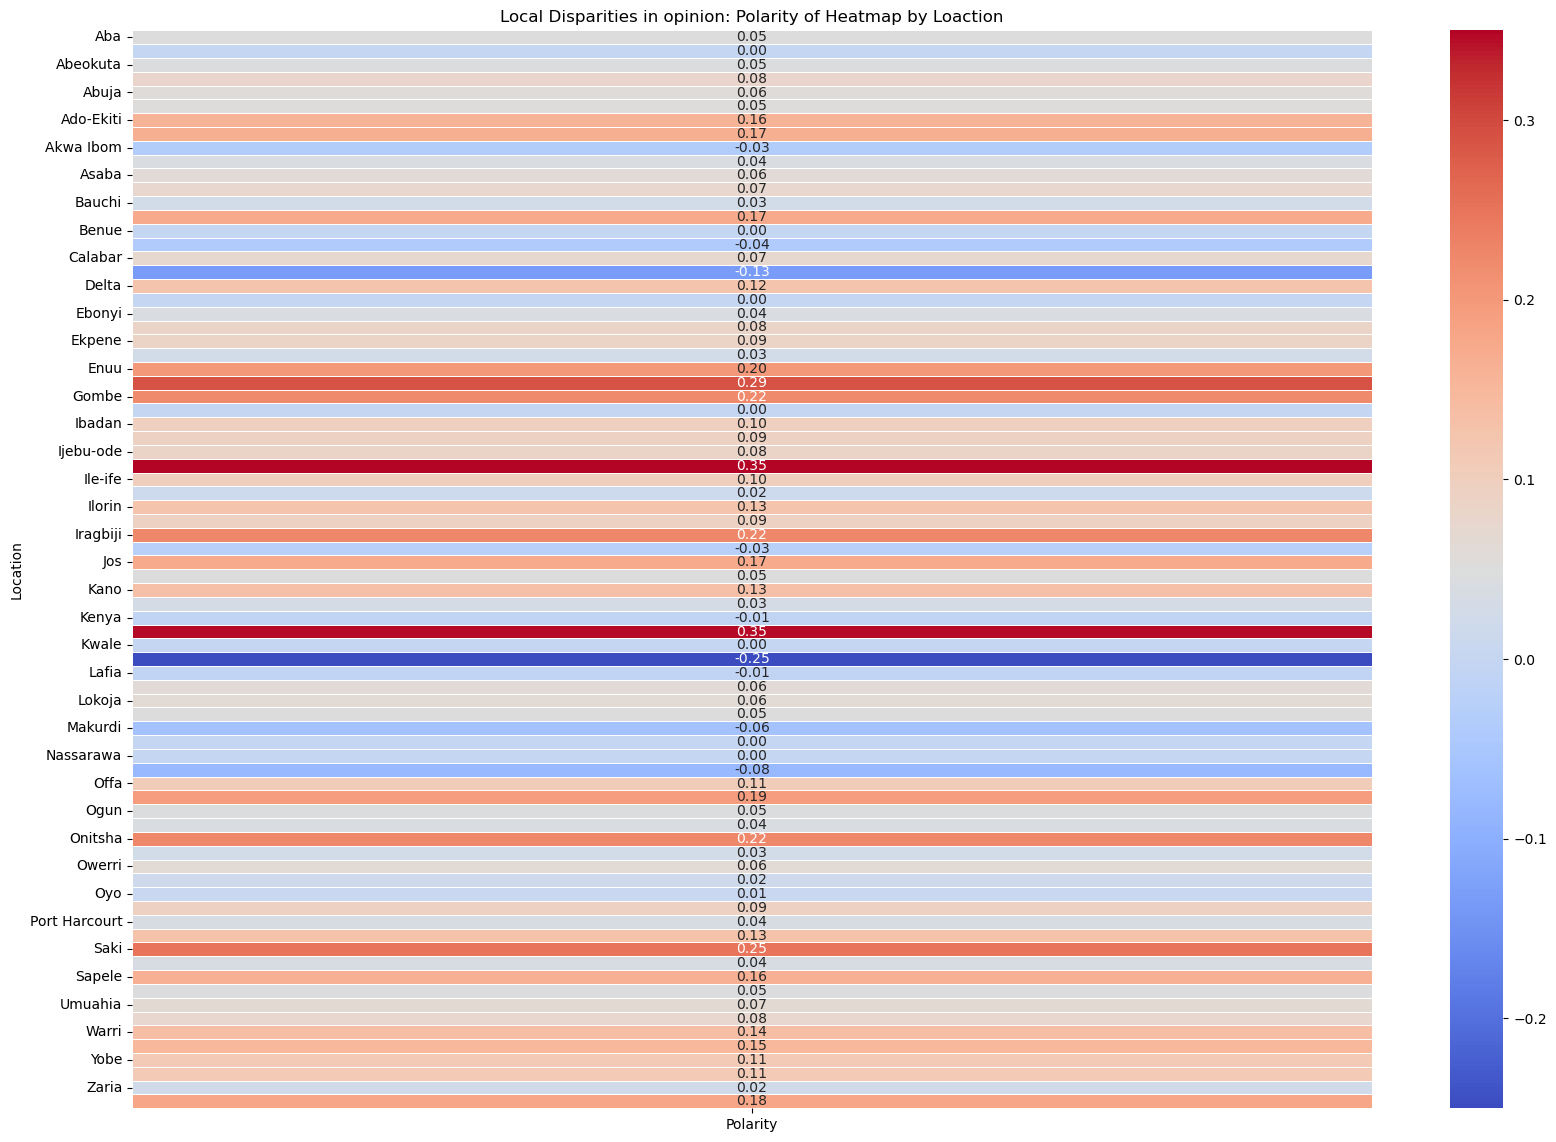

In [971]:
plt.figure(figsize=(20,14))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title("Local Disparities in opinion: Polarity of Heatmap by Loaction")
plt.show()

- Observations:
- Locations like Ijebuode, makurdi, ekpere, ebonyi and calabar  exhibit negative polarities with ijebuode being the most negative at -0.11 may indicate dissatisfaction or unhappiness with the transport subsidy policy.  
- Positive sentiment in Locations like ado, benue, iragbiji, and kwale imply a more favorable view of the transport subsidy policy, the residents in these locations may be content or happy with the policy’s impact
- Lokoja, showing a relatively neutral sentiment indicates moderate or mixed response to the transport subsidy policy, the light blue suggests a balanced perception, possibly with a range of opinions from satisfaction to some level of concern


# Keyword Extraction for Positive and Negative Tweet

In [972]:
positive_Comment = df1[df1['sentiment'] == 'Positive']['clean_Comment']

In [973]:
neutral_Comment = df1[df1['sentiment'] == 'Neutral']['clean_Comment']
negative_Comment = df1[df1['sentiment'] == 'Negative']['clean_Comment']

In [974]:
positive_Comment

2       This is commendable Thank you our able GCFR, P...
3       How would that be implemented knowingly well t...
5       FG has no control over the cost of transport, ...
21      I wonder how govt can reduce transport while t...
24      This is commendable Thank you our able GCFR, P...
                              ...                        
1012                       Na which transports company oo
1026                                            Big joke!
1038    @nwachukwunkechi8 Una go do am if you don get ...
1041    If this government is sensitive all the presid...
1045                                  Train ride ???? omg
Name: clean_Comment, Length: 303, dtype: object

In [975]:
#remove stopwords and convert to tokens
positive_Comment_list = positive_Comment.apply(nfx.remove_stopwords).tolist()

In [976]:
negative_Comment_list = negative_Comment.apply(nfx.remove_stopwords).tolist()
neutral_Comment_list = neutral_Comment.apply(nfx.remove_stopwords).tolist()

In [977]:
positive_Comment_list

['commendable Thank able GCFR, President Asiwaju Bola Ahmed Tinubuu',
 'implemented knowingly 95% transport sector manage individuals private companies?',
 'FG control cost transport, control fuel cheap N200/litre repair federal government roads NO, that. Karma real.',
 'wonder govt reduce transport buses ,',
 'commendable Thank able GCFR, President Asiwaju Bola Ahmed Tinubuu',
 'implemented knowingly 95% transport sector manage individuals private companies?',
 'FG control cost transport, control fuel cheap N200/litre repair federal government roads NO, that. Karma real.',
 'wonder govt reduce transport buses ,',
 '?Become ILLUMINATI FRATERNITY achieve dreams RICH FAMOUS??. India?, Africa?, United States?, Romania?, Germany? Africa world??Your time now??Whatsapp: +2348108126990 click link chat mehttps://wa.me/+2348108126990?text=Hail%20*THE%20LIGHT,*%20I%20will%20love%20to%20%20Join%20the%20illuminati%20Brotherhood%20',
 'work UBA collect salary GTB? FG transport company train where? 

In [978]:
negative_Comment_list

["There's simply sense this. transporters 50% discount cost fuel vehicle maintenance requirements?",
 '35k pallative unable paid trying hope mases.',
 'government good telling tales moonlight. pathetic.',
 "There's simply sense this. transporters 50% discount cost fuel vehicle maintenance requirements?",
 '35k pallative unable paid trying hope mases.',
 'government good telling tales moonlight. pathetic.',
 'Owoowoo, happens foodstuff price market? Abi dey waka stomach?',
 '2me, dat help Nainja. Let President bring prize PMS GAS. body buy gas 100k den intrest.',
 "Awa lokon dey enjoy small...... foolish people... Bcuz na buy motor & fuel drivers instead reduce fuel price & food stuff idiot people thank God poverty na Hausa & yoruba's e affect pass.....",
 'bring fuel price totally',
 'talking foodstuff, gas fuel bring',
 'bringing fuel price?? Thunder fire una there!',
 "government owned transport cut individual, let know,ls better they're dealt fuel",
 'long way',
 'Naija things dey w

# Tokenization

In [979]:
for line in positive_Comment_list:
    print(line)
    for token in line.split():
        print(token)

commendable Thank able GCFR, President Asiwaju Bola Ahmed Tinubuu
commendable
Thank
able
GCFR,
President
Asiwaju
Bola
Ahmed
Tinubuu
implemented knowingly 95% transport sector manage individuals private companies?
implemented
knowingly
95%
transport
sector
manage
individuals
private
companies?
FG control cost transport, control fuel cheap N200/litre repair federal government roads NO, that. Karma real.
FG
control
cost
transport,
control
fuel
cheap
N200/litre
repair
federal
government
roads
NO,
that.
Karma
real.
wonder govt reduce transport buses ,
wonder
govt
reduce
transport
buses
,
commendable Thank able GCFR, President Asiwaju Bola Ahmed Tinubuu
commendable
Thank
able
GCFR,
President
Asiwaju
Bola
Ahmed
Tinubuu
implemented knowingly 95% transport sector manage individuals private companies?
implemented
knowingly
95%
transport
sector
manage
individuals
private
companies?
FG control cost transport, control fuel cheap N200/litre repair federal government roads NO, that. Karma real.
FG
co

In [980]:
pos_tokens=[token for line in positive_Comment_list for token in line.split()]

In [981]:
neg_tokens=[token for line in negative_Comment_list for token in line.split()]
neut_tokens=[token for line in neutral_Comment_list for token in line.split()]

In [982]:
pos_tokens

['commendable',
 'Thank',
 'able',
 'GCFR,',
 'President',
 'Asiwaju',
 'Bola',
 'Ahmed',
 'Tinubuu',
 'implemented',
 'knowingly',
 '95%',
 'transport',
 'sector',
 'manage',
 'individuals',
 'private',
 'companies?',
 'FG',
 'control',
 'cost',
 'transport,',
 'control',
 'fuel',
 'cheap',
 'N200/litre',
 'repair',
 'federal',
 'government',
 'roads',
 'NO,',
 'that.',
 'Karma',
 'real.',
 'wonder',
 'govt',
 'reduce',
 'transport',
 'buses',
 ',',
 'commendable',
 'Thank',
 'able',
 'GCFR,',
 'President',
 'Asiwaju',
 'Bola',
 'Ahmed',
 'Tinubuu',
 'implemented',
 'knowingly',
 '95%',
 'transport',
 'sector',
 'manage',
 'individuals',
 'private',
 'companies?',
 'FG',
 'control',
 'cost',
 'transport,',
 'control',
 'fuel',
 'cheap',
 'N200/litre',
 'repair',
 'federal',
 'government',
 'roads',
 'NO,',
 'that.',
 'Karma',
 'real.',
 'wonder',
 'govt',
 'reduce',
 'transport',
 'buses',
 ',',
 '?Become',
 'ILLUMINATI',
 'FRATERNITY',
 'achieve',
 'dreams',
 'RICH',
 'FAMOUS??.',
 '

In [983]:
#getting the most common keywords used 
from collections import Counter

In [984]:
def get_tokens(docx, num=30):
    word_tokens = Counter(docx)
    most_common = word_tokens.most_common(num)
    result = dict(most_common)
    return result

In [985]:
get_tokens(pos_tokens)

{'?': 38,
 'fuel': 29,
 '??': 28,
 'government': 27,
 '???': 23,
 '????': 23,
 'transport': 17,
 'people': 15,
 'price': 14,
 'reduce': 12,
 'train': 12,
 'na': 12,
 '?????': 12,
 'free': 11,
 'going': 11,
 'travel': 11,
 'una': 10,
 'u': 10,
 'transportation': 10,
 '50%': 10,
 'God': 10,
 'dey': 10,
 'don\x92t': 10,
 'buy': 9,
 'ur': 9,
 '???????': 9,
 'like': 9,
 'man': 9,
 'buses': 8,
 'Nigeria': 8}

In [986]:
most_common_pos_words = get_tokens(pos_tokens)
most_common_neg_words = get_tokens(neg_tokens)
most_common_neut_words = get_tokens(neut_tokens)

In [987]:

neg_df1 = pd.DataFrame(most_common_neg_words.items(), columns=['words', 'count'])

In [988]:
neg_df1

,words,count
0,fuel,17
1,government,17
2,transport,12
3,price,11
4,dey,11
5,?,10
6,na,9
7,reduce,9
8,people,8
9,???,8


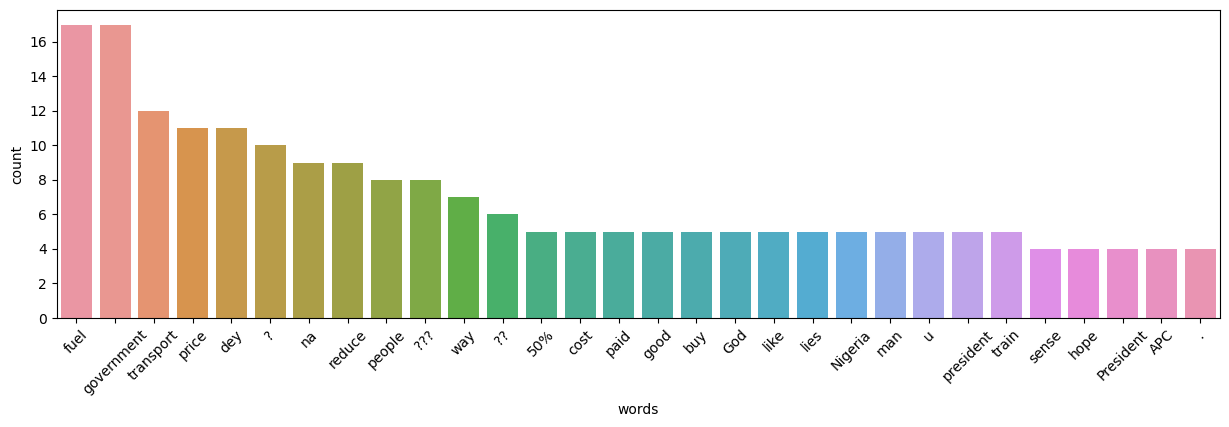

In [989]:
plt.figure(figsize=(15,4))
sns.barplot(x ='words', y='count', data=neg_df1)
plt.xticks(rotation=45)
plt.show()

In [990]:
#for positive sentiment
pos_df1 = pd.DataFrame(most_common_pos_words.items(), columns=['words', 'count'])

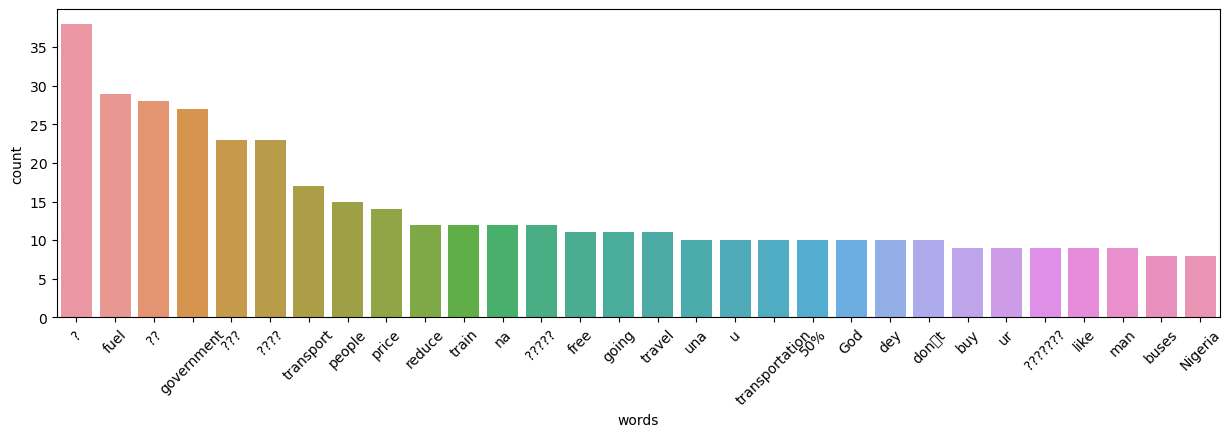

In [991]:
plt.figure(figsize=(15,4))
sns.barplot(x ='words', y='count', data=pos_df1)
plt.xticks(rotation=45)
plt.show()

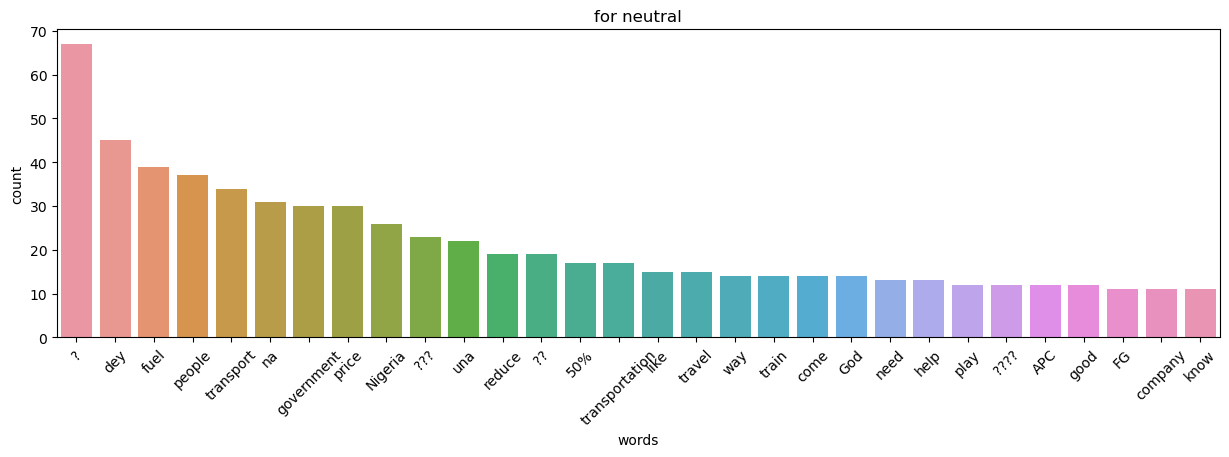

In [992]:
# for neutral
neut_df1 = pd.DataFrame(most_common_neut_words.items(), columns=['words', 'count'])
plt.figure(figsize=(15,4))
sns.barplot(x ='words', y='count', data=neut_df1)
plt.xticks(rotation=45)
plt.title("for neutral")
plt.show()

# frequently used keywords and phrases

In [993]:
from wordcloud import WordCloud

In [994]:
def plot_wordcloud(docx):
    plt.figure(figsize=(10,5))
    mywordcloud = WordCloud().generate(docx)
    plt.imshow(mywordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [995]:
pos_docx= ' '.join(pos_tokens)
neg_docx= ' '.join(neg_tokens)
neut_docx= ' '.join(neut_tokens)

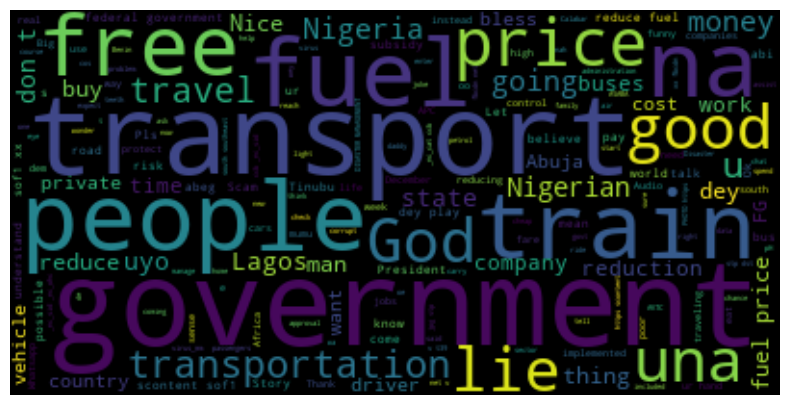

In [996]:
plot_wordcloud(pos_docx)

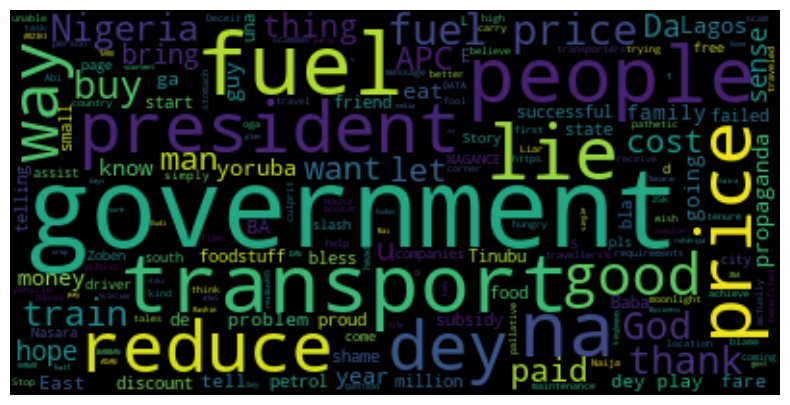

In [997]:
plot_wordcloud(neg_docx)

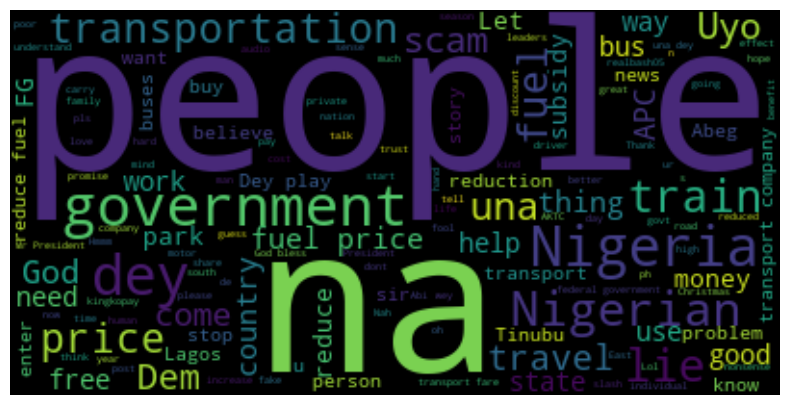

In [998]:
plot_wordcloud(neut_docx)

# Sentiment Across User Demographics

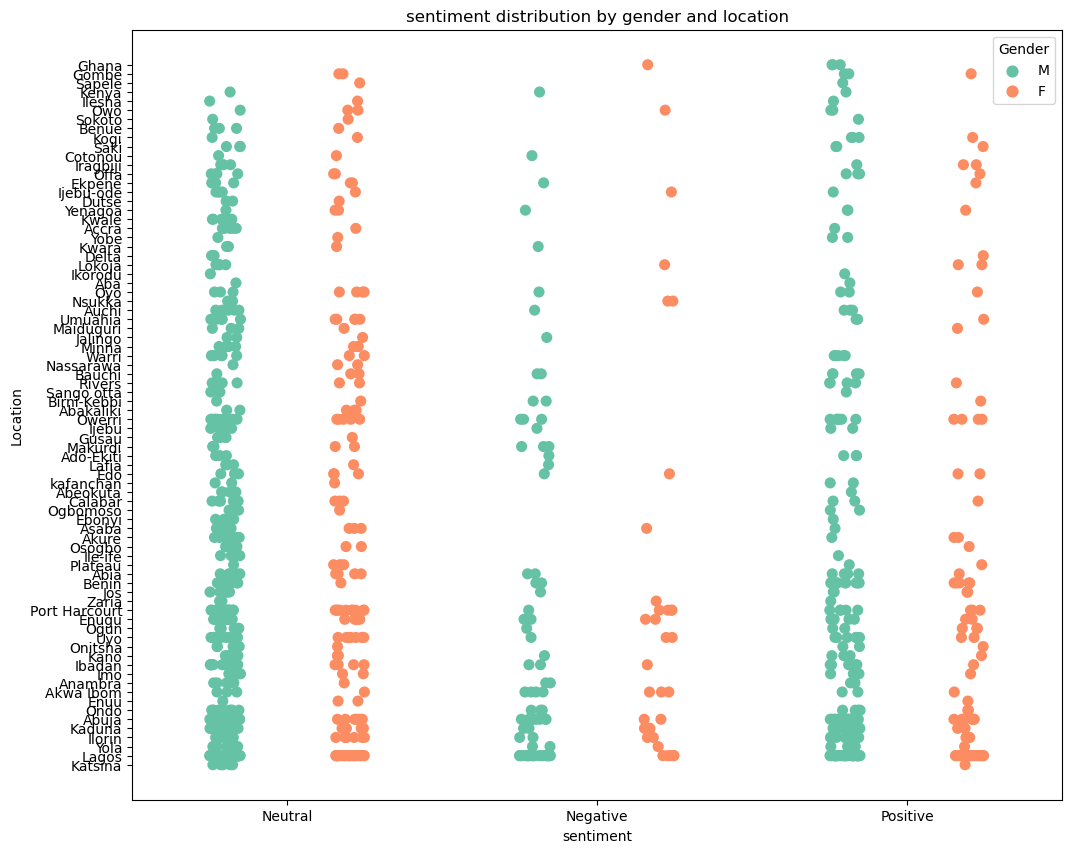

In [1009]:
plt.figure(figsize=(12,10))
sns.stripplot(y='Location', x = 'sentiment', hue = 'Gender', data = df1, palette='Set2', jitter=True,
             dodge=True, size = 8)
plt.title('sentiment distribution by gender and location')
plt.ylabel('Location')
plt.xlabel('sentiment')
plt.show()

- Observations:

- Neutral sentiment: males tend to express neutral sentiments more than females and this might suggest that there is a balanced or neutral sentiment regarding the 50% transport subsidy, with males expressing their views slightly more frequently
- Negative sentiment: Both males and females express negative sentiments similarly. This could mean that negative sentiments regarding the 50% transport subsidy are distributed evenly among both genders
- Positive sentiment: males tend to express positive sentiments more than females and this suggests that males are more likely to express positive views or support for the 50% transport subsidy compared to females


In [1015]:
df1.to_csv('full_transport_data.csv', index=False)

# Conclusion
The analysis shows significant patterns regarding the 50% transport subsidy.
-	Males dominate the data more than Females and this may indicate differing priorities or experiences related to the transport subsidy
-	Lagos leads in comment contributions, followed by Abuja, Kaduna, Port Harcourt and Enugu. 
This observation highlights that Lagos, the most populous city in Nigeria stands out with the highest number of comments and the concentration of comments in Lagos may be attributed to its high population density and active online presence
-	December, 2023 has the highest activity, while January, 2024 shows the least engagement 
-	Wednesday attracts the highest number of comments followed by Thursday, with Monday being the least engaged day. The higher activity on Wednesday and Thursday may be attributed to a mid-week surge in participation, possibly driven by events, discussions, or trends that commonly occur during this period 
-	As regards the sentiment, neutral sentiments dominate, followed by positive sentiments and negative sentiments are the least expressed, this suggests that a considerable number of individuals may hold neutral opinions or have mixed sentiments regarding the transportation policy. The positive sentiment comes next in frequency, indicating a favorable view from another portion of respondents. On the other hand, the negative sentiment category has the lowest frequency, suggesting that a smaller portion of individuals express explicitly negative opinions.
-	Correlating the user demographics with sentiment tells that males may be more inclined to express their sentiments, and the observed trend also indicate that males are more actively engaging with expressing opinions on the topic of the 50% transport subsidy compared to females 
